## Методы text-similarity ##

https://www.quora.com/What-are-the-most-popular-text-similarity-algorithms

1. doc2vec + cosine measure https://code.google.com/archive/p/word2vec/ 
<br>
    GloVe + cosine https://nlp.stanford.edu/projects/glove/
   <br>
   https://github.com/v1shwa/document-similarity
2. Jaccard similarity 
<br>
    https://en.wikipedia.org/wiki/Jaccard_index
<br>
    https://nickgrattan.wordpress.com/2014/02/18/jaccard-similarity-index-for-measuring-document-similarity/
3. Locality-sensitive hashing  
    https://en.wikipedia.org/wiki/Locality-sensitive_hashing 
<br>
    https://github.com/kayzhu/LSHash
<br>
    http://www.mmds.org/
4. Cosine Similarity and IDF Modified Cosine Similarity https://www.youtube.com/watch?v=C3Jt14Se9Cg&feature=youtu.be
<br>
<br>
* cosine similarity in gensim: https://radimrehurek.com/gensim/similarities/docsim.html
<br>
<br>
https://stackoverflow.com/questions/35758612/most-efficient-way-to-construct-similarity-matrix
<br>
<br>
https://ematosevic.wordpress.com/2016/08/21/clustering-data-with-similarity-matrix-in-python-tutorial/

### Articles data

In [1]:
import sys
sys.path.append('C:\Program Files\Anaconda3\Lib\site-packages')

In [2]:
import pandas as pd
import re
#from nltk.corpus import stopwords
import sklearn
#from sklearn.pipeline import Pipeline

#stopwords_rus = stopwords.words('russian')
from stop_words import get_stop_words
stopwords = get_stop_words('russian')
import numpy as np

In [3]:
from tqdm import tqdm

In [4]:
metadata = pd.read_csv('meta_rubrics_final.tsv', encoding = 'utf-8', sep = '\t')

In [6]:
texts = []
for path in tqdm(metadata.path):
    path = path.replace('\n','').replace('//','/').replace('?code=','-code=')
    try:
        with open('C:/Users/Анна/YandexDisk/popular_science_texts_store/' + path, encoding = 'utf-8') as f:
            texts.append(f.read())
    except OSError:
        texts.append('')

100%|██████████████████████████████████| 30793/30793 [00:19<00:00, 1539.69it/s]


In [7]:
metadata['text'] = texts

In [10]:
metadata.shape

(30793, 13)

In [12]:
articles_df = metadata[metadata.text != '']

In [13]:
articles_df.to_csv('articles_with_meta.tsv', sep = '\t', index = False, encoding = 'utf-8')

In [4]:
articles_df = pd.read_csv('articles_with_meta.tsv', sep = '\t', encoding = 'utf-8')

In [5]:
articles_df.head()

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
0,chrdk.ru/articles/sci_10_salt_lakes.txt,https://chrdk.ru/,https://chrdk.ru/sci/10_salt_lakes,16.08.2017,Десять самых известных соленых озер,NaN,Егор Задереев,География_Экология,Статьи,Науки о земле|Науки о земле,Науки о земле,One,"Возможно, не все об этом знают, но объемы воды..."
1,chrdk.ru/articles/sci_33_fractures.txt,https://chrdk.ru/,https://chrdk.ru/sci/33_fractures,08.08.2017,33 перелома,Скелет мужчины с 33 переломами нашли археологи...,Екатерина Боровикова,Российская наука_Антропология,Статьи,История|Мусор,История,One,Останки мужчины с зажившими переломами нашли п...
2,chrdk.ru/articles/sci_46_chromosomes.txt,https://chrdk.ru/,https://chrdk.ru/sci/46_chromosomes,04.08.2017,46 — норма?,Считаем хромосомы: сколько человеку для счасть...,Полина Лосева,Генетика_Медицина,Статьи,Физиология человека|Физиология человека,Физиология человека,One,"В отличие от зубов, хромосом человеку положено..."
3,chrdk.ru/articles/sci_750gev.txt,https://chrdk.ru/,https://chrdk.ru/sci/750gev,23.08.2016,Несбывшиеся надежды на новую физику,Какие «страшные сценарии» физики хотели забыть...,Екатерина Боровикова,Физика_Интервью_Закрытия,Статьи,Мусор|Мусор|Физика,Физика,One,"В начале августа CERN официально объявил, что ..."
4,chrdk.ru/articles/sci_alien_anatomy.txt,https://chrdk.ru/,https://chrdk.ru/sci/alien_anatomy,22.05.2017,Анатомия каменных пришельцев,Спецпроект «Чердака» и «Красивой науки»,NaN,Геология_Космос,Статьи,Космос|Науки о земле,Космос,Multi,Как выглядят и чем отличаются друг от друга го...


In [5]:
#without lemmatization and stop-words
def simple_clean(texts):
    preprocessed_texts_list = []
    for text in tqdm(texts):
        #del_new_line = re.sub(r'\n', '', text.lower()) 
        extracted_text = re.findall(r'[a-zа-яё]+', text.lower())#разделяем на токены
        extracted_text = ' '.join(extracted_text)
        preprocessed_texts_list.append(extracted_text)
    return preprocessed_texts_list

In [6]:
small = articles_df[articles_df.final_rubrics != 'Мусор'].sample(n=100)

In [7]:
small = small.reset_index(drop = True)

In [8]:
small.head()

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
0,polit.ru_proscience/proscience_news/news-2014-...,http://polit.ru/rubric/proscience/,polit.ru//news/2014/06/04/ps_dothraki/,04 июня 2014,Будет издан учебник дотракийского языка,NaN,NaN,_кино_литература_язык,Новости,Культура|Культура|Язык,Культура,One,\n \n \n \n \n Американский кабельный...
1,nplus1.ru/nplus1_news/nplus1.ru-news-2017-07-1...,nplus1.ru,nplus1.ru/news/2017/07/13/obama-lip-sync,2017-07-13,Нейросеть научила Барака Обаму говорить под фо...,NaN,Елизавета Ивтушок,_IT_Технологии_,Новости,Технологии|Технологии,Технологии,One,"Apocalypse Now / American Zoetrope, 1979 Иссле..."
2,postnauka.ru\8\25927.txt,https://postnauka.ru,/talks/25927,26 May 2014,Прямая речь: Филипп Хайтович,"Молекулярный биолог, руководитель группы сравн...",Филипп Хайтович,биология,talks,Биология,Биология,One,"В Китай я поехал в 2006 году, потому что там о..."
3,chrdk.ru/news/news_letuchie-myshi-umeyut-uchit...,https://chrdk.ru/,https://chrdk.ru/news/letuchie-myshi-umeyut-uc...,31.10.2017,Летучие мыши умеют учить местные диалекты,NaN,NaN,Науки о живом_Животные,Новости,Биология|Биология,Биология,One,"Ученые из Израиля выяснили, что летучие мыши у..."
4,geektimes.ru/post_262052.txt,https://geektimes.ru/hub/popular_science/,https://geektimes.ru/post/262052,7 сентября 2015,Полёт капли воды в условиях микрогравитации на...,NaN,Анатолий Ализар,Физика_Научно-популярное_Космонавтика,Статьи,Космос|Мусор|Физика,Космос,Multi,\n\nВ эти выходные сообщество «Что за магия?!»...


In [9]:
articles_small = pd.DataFrame(data = list(zip(small.path, small.title, small.tags, small.final_rubrics, small.number_of_rubrics, small.text)), 
                        columns = ['path', 'title', 'tags', 'rubrics', 'rubrics_number', 'text'])

In [10]:
articles_small.head()

,path,title,tags,rubrics,rubrics_number,text
0,polit.ru_proscience/proscience_news/news-2014-...,Будет издан учебник дотракийского языка,_кино_литература_язык,Культура,One,\n \n \n \n \n Американский кабельный...
1,nplus1.ru/nplus1_news/nplus1.ru-news-2017-07-1...,Нейросеть научила Барака Обаму говорить под фо...,_IT_Технологии_,Технологии,One,"Apocalypse Now / American Zoetrope, 1979 Иссле..."
2,postnauka.ru\8\25927.txt,Прямая речь: Филипп Хайтович,биология,Биология,One,"В Китай я поехал в 2006 году, потому что там о..."
3,chrdk.ru/news/news_letuchie-myshi-umeyut-uchit...,Летучие мыши умеют учить местные диалекты,Науки о живом_Животные,Биология,One,"Ученые из Израиля выяснили, что летучие мыши у..."
4,geektimes.ru/post_262052.txt,Полёт капли воды в условиях микрогравитации на...,Физика_Научно-популярное_Космонавтика,Космос,Multi,\n\nВ эти выходные сообщество «Что за магия?!»...


In [11]:
articles_small.text[1][:1000]

'Apocalypse Now / American Zoetrope, 1979 Исследовательский центр авиационной и ракетной техники Армии США продемонстрировал работу робототехнического авиационного заправочного комплекса AR3P. Об этом сообщается на сайте армии.Ударные вертолеты, как правило, не предназначены для длительного непрерывного полета — самые распространенные ударные вертолеты Ми-24 и AH-64 летают меньше трех часов. При необходимости на вертолеты можно установить ПТБ, однако они ухудшают аэродинамику летательного аппарата и занимают место на подкрыльевых пилонах, уменьшая количество контейнеров с вооружением. Таким образом, для оперативной дозаправки вертолетов в районе боевых действий приходится разворачивать пункт заправки, а это, в свою очередь, создает риск для персонала заправочного комплекса. Демонстрация работы AR3P на макете вертолета Kathleen Edwards / U.S. Army Демонстрация работы AR3P на макете вертолета Kathleen Edwards / U.S. Army Американские военные продемонстрировали прототип автономного робото

In [12]:
import pymorphy2

In [13]:
morph = pymorphy2.MorphAnalyzer()

In [14]:
def preprocess(texts, stopwords):
    clean_texts = []
    for text in tqdm(texts):
        words = re.findall(r'[a-zа-яё]+', text.lower())#разделяем на токены
        #words = re.findall(r'[а-яё]+', text.lower())
        lemmas = [morph.parse(word)[0].normal_form for word in words if word not in stopwords]
        clean_texts.append(' '.join(lemmas))
    return clean_texts

In [15]:
articles_small.text = preprocess(articles_small.text, stopwords)

100%|████████████████████████████████████████| 100/100 [00:32<00:00,  3.08it/s]


In [16]:
articles_small.text[1][:1000]

'apocalypse now american zoetrope исследовательский центр авиационный ракетный техника армия сша продемонстрировать работа робототехнический авиационный заправочный комплекс ar p сообщаться сайт армия ударный вертолёт правило предназначить длительный непрерывный полёт самый распространить ударный вертолёт ми ah летать три часы необходимость вертолёт установить птб ухудшать аэродинамика летательный аппарат занимать место подкрыльевой пилон уменьшать количество контейнер вооружение такой образ оперативный дозаправка вертолёт район боев действие приходиться разворачивать пункт заправка очередь создавать риск персонал заправочный комплекс демонстрация работа ar p макет вертолёт kathleen edwards u s army демонстрация работа ar p макет вертолёт kathleen edwards u s army американский военный продемонстрировать прототип автономный робототехнический удалённый пункт заправка ar p autonomous robotic remote refueling poin самостоятельно справляться задача заправка ударный вертолёт данный момент пр

In [21]:
articles_small.head(10)

,path,title,tags,rubrics,rubrics_number,text
0,polit.ru_proscience/proscience_articles/articl...,Серебро Харальда Синезубого,_археология_викинги_дания_история,История,One,статья опубликовать журнал scie ce описывать в...
1,nplus1.ru/nplus1_news/nplus1.ru-news-2016-01-2...,Опубликовано видео облета Цереры,_Космос_,Космос,One,некоторый вырастить air bonsai фотография hosh...
2,polit.ru_proscience/proscience_news/news-2017-...,«Морские ежи» из серебра защитят нефтепроводы ...,_химия,Химия,One,серебряный пудра использоваться защитный покры...
3,geektimes.ru/post_275506.txt,Продвинутые семьи начинают применять самодельн...,Носимая электроника_Научно-популярное_Киберпан...,Технологии,Multi,медицинский компания работать создание искусст...
4,geektimes.ru/company_balrobotov_blog_264082.txt,Бронебот 2015: Осенний разогрев. Первая больша...,Блог компании ВиЭмТи Групп_Научно-популярное_Р...,Технологии,One,ые тв множество интересный телешоу среди особн...
5,polit.ru_proscience/proscience_news/news-2016-...,56 миллионов лет назад в Землю врезалась комета,_геология_климатология_прошлое земли,Науки о земле,One,группа учёный предложить объяснение причина по...
6,postnauka.ru\4\27955.txt,Иероглифические надписи майя,история,История,One,надпись монумент создаваться царь цель конец п...
7,chrdk.ru/articles/sci_kak_rabotaet_genetichesk...,Найти и заменить,Биотехнологии_Генетика_Российская наука_Репорт...,Биология,Multi,воскресить мамонт отредактировать человеческий...
8,polit.ru_proscience/proscience_news/news-2017-...,В Германии открыта пещерная рыба,_биология _биоразнообразие_германия_рыбы,Биология,One,карстовый пещера горный массив швабский альб ю...
9,polit.ru_proscience/proscience_news/news-2014-...,Радиоволны раскрашивают картины американского ...,_wi-fi_искусство_связь и телекоммуникации_сото...,Технологии,One,проект американский художник николай лэмма nic...


## Jaccard similarity

In [55]:
#jaccard_similarity_score(vectorized.toarray()[5], vectorized.toarray()[18])

0.92603767430481942

In [21]:
#from scipy.spatial.distance import jaccard, pdist, squareform
#jaccard(vectorized[58], vectorized[18])

In [74]:
#vect.vocabulary_.get('возможно')

1769

In [22]:
#через пересечение/объединение множеств слов в документах
def jaccard_similarity(doc1, doc2):
    words_doc1 = set(doc1.split())
    words_doc2 = set(doc2.split())
    intersection = words_doc1.intersection(words_doc2)
    #print(intersection)
    union = words_doc1.union(words_doc2)
    #print(union)
    return len(intersection)/len(union)

In [23]:
jaccard_similarity(articles_small.text[0], articles_small.text[9])

0.0498220640569395

In [24]:
jaccard_similarity(articles_small.text[4], articles_small.text[9])

0.051094890510948905

In [25]:
jaccard_similarity(articles_small.text[11], articles_small.text[14])

0.017130620985010708

In [28]:
articles_small.text[4][:1000]

'запуск ракета носитель antares c корабль cygnus космодром остров уоллопс nasa ракета носитель antares грузовой корабль cygnus успешно стартовать американский космодром остров уоллопс ноябрь московский минута старт два ступень вывести корабль целевой орбита высота километр грузовик отделиться отправиться самостоятельный полёт мкс стыковка планироваться ноябрь запуск удаться осуществить попытка первоначально планироваться суббота последний минута отложить сутки появление лёгкое самолёт закрытый зона космодром корабль назвать s s gene cernan честь астронавт юджин сернана последний данный момент человек стоять поверхность луна доставить мкс продовольствие экипаж научный оборудование груз например специальный камера съёмка образовательный vr фильм малое спутник стандарт cubesat стыковка корабль станция планироваться ноябрь трансляция запуск идти официальный сайт nasa корабль cygnus приближаться мкс orbital atk космический грузовик cygnus разработать рамка программа nasa commercial orbital 

In [29]:
articles_small.text[9][:1000]

'группа астроном рассказать обнаружение возможный спутник планета находиться предел солнечный система последний год подозрение существование такой спутник высказываться повод несколько экзопланета один случай наличие доказать окончательно возможно нынешний спутник стать один существование удаться подтвердить спутник кандидат получить условный обозначение kepler b i обнаружить анализ дать собранный космический телескоп кеплер звезда система принадлежать kepler находиться созвездие лебедь расстояние светов солнце звезда вращаться планет газовый гигант размер примерно юпитер масса спутник обнаружить учёный свой размер сопоставимый нептун научный коллектив заметить влияние спутник изменение блеск звезда возглавлять дэвид киппинга david kippi g колумбийский университет слово поиск экзоспутник потратить большой часть взрослый жизнь найти спутник наблюдать яркость звезда значительно сложный обнаружить такой способ экзопланет учёный отслеживать небольшой кратковременный падение яркость происхо

In [22]:
import numpy as np

In [32]:
def jaccard_matrix(text_list):
    n = len(text_list)
    similarity_matr = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1):
            #if j <= i:
                similarity_matr[i, j] = jaccard_similarity(text_list[i], text_list[j])
                similarity_matr[j, i] = similarity_matr[i, j]
    return similarity_matr
    

In [35]:
%%time
m = jaccard_matrix(articles_small.text)


Wall time: 3.78 s


In [36]:
jaccard_m = pd.DataFrame(m.round(2))

In [37]:
jaccard_m

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.00,0.02,0.04,0.08,0.03,0.04,0.04,0.06,0.02,0.05,...,0.06,0.04,0.04,0.05,0.03,0.04,0.05,0.05,0.03,0.07
1,0.02,1.00,0.02,0.05,0.02,0.02,0.04,0.03,0.02,0.04,...,0.03,0.01,0.01,0.02,0.01,0.04,0.04,0.02,0.02,0.05
2,0.04,0.02,1.00,0.04,0.02,0.03,0.02,0.01,0.02,0.04,...,0.02,0.02,0.02,0.04,0.01,0.02,0.02,0.04,0.03,0.02
3,0.08,0.05,0.04,1.00,0.02,0.01,0.02,0.05,0.03,0.04,...,0.05,0.02,0.04,0.04,0.03,0.04,0.05,0.08,0.03,0.05
4,0.03,0.02,0.02,0.02,1.00,0.04,0.05,0.03,0.04,0.05,...,0.03,0.04,0.02,0.05,0.03,0.04,0.04,0.02,0.05,0.03
5,0.04,0.02,0.03,0.01,0.04,1.00,0.05,0.05,0.02,0.04,...,0.03,0.04,0.02,0.04,0.02,0.05,0.04,0.02,0.02,0.04
6,0.04,0.04,0.02,0.02,0.05,0.05,1.00,0.05,0.02,0.04,...,0.04,0.03,0.01,0.04,0.04,0.04,0.02,0.00,0.03,0.03
7,0.06,0.03,0.01,0.05,0.03,0.05,0.05,1.00,0.03,0.07,...,0.06,0.04,0.08,0.06,0.03,0.05,0.10,0.06,0.04,0.05
8,0.02,0.02,0.02,0.03,0.04,0.02,0.02,0.03,1.00,0.02,...,0.03,0.02,0.01,0.06,0.02,0.00,0.02,0.01,0.02,0.01
9,0.05,0.04,0.04,0.04,0.05,0.04,0.04,0.07,0.02,1.00,...,0.07,0.04,0.05,0.06,0.06,0.07,0.04,0.04,0.06,0.05


In [135]:
m[15,69]

0.036610878661087864

In [57]:
m.min()

0.0

In [40]:
m.mean()

0.046914328159998978

In [34]:
mask = np.ones((100,100)) 
mask = (mask - np.diag(np.ones(100))).astype(np.bool)

In [42]:
np.amax(m[mask])

0.14317180616740088

In [43]:
i, j = np.where(m == 0.14317180616740088)
print(i,j)

[37 56] [56 37]


In [44]:
articles_small.text[37][:1000]

'часть население земля рождаться светлый кожа родина человечество африка цвета кожа наш предок тёмный долгий популярный оставаться гипотеза светлый кожа достаться европеец неандерталец анализ днк неандерталец показать популяция встречаться разный цвета волос кожа современный исследование опровергать популярный гипотеза доказывать цвета кожа обитатель европа начать меняться вымирание неандерталец постепенно оттенок приближаться современный изменение цвет кожа объяснять физиологический процесс высокий мужчина светлый кожа усваивать лактоза типичный описание современный юноша европеоидный раса действительность европейский юноша европеец светлый кожа новый материал genotek делить кожа древний человек находиться компания антрополог генетик эволюционист скучно спросить скрещиваться предок современный человек неандерталец спорый тема вестись десяток верить исследование неандерталец привлекательный внешность встречаться разный оттенок волос кожа сторона неандерталец общий анализ днк показывать

In [45]:
articles_small.text[56][:1000]

'генетически человек близкий свинья неправда вопрос легко проверяться берет последовательность геном человек млекопитающее смотреть похожий никакой чудо происходить похожий шимпанзе горилла примат грызун свинья рассматривать случай результат забавный ближний родственник свинья оказаться бегемот кит успех молекулярный эволюционный биология кит настолько измениться морфологический признак понять похожий трудно возможный источник миф свинья некоторый белок делать ткань узнавать иммунный система человек свиной орган хороший среди млекопитающее образ приспособить пересаживать человек генный модифицированный свинья дополнительно подавить некоторый ген шимпанзе подходить никто дать замучить шимпанзе спасти человек любой случай генетически правильный термин говорить например генетически двоюродный брат близкий друг друг четвероюродный сопоставлять животное скрещиваться генетик генетика наука происходить потомство скрещивание особый правильный термин филогенетически отражать происхождение точка

#### На всех текстах

In [82]:
articles = pd.DataFrame(data = list(zip(metadata.path, metadata.title, metadata.tags, metadata.final_rubrics, metadata.number_of_rubrics)), 
                        columns = ['path', 'title', 'tags', 'rubrics', 'rubrics_number'])

In [84]:
texts = []
for path in tqdm(metadata.path):
    path = path.replace('\n','').replace('//','/').replace('?code=','-code=')
    try:
        with open('C:/Users/Анна/YandexDisk/popular_science_texts_store/' + path, encoding = 'utf-8') as f:
            texts.append(f.read())
    except OSError:
        texts.append('')

100%|██████████████████████████████████| 30793/30793 [00:18<00:00, 1700.19it/s]


In [85]:
articles['text'] = texts

In [86]:
articles[1000:1005]

,path,title,tags,rubrics,rubrics_number,text
1000,chrdk.ru/news/news_magnetic-stem-cells.txt,Теперь стволовыми клетками можно управлять при...,NaN,Мусор,One,Французские ученые ввели наночастицы железа в ...
1001,chrdk.ru/news/news_magnetite_vs_trombus.txt,Химики создали магнитоуправляемый препарат для...,Материаловедение_Российская наука_Медицина_Нау...,Физиология человека,Multi,Ученые университета ИТМО вместе с санкт-петерб...
1002,chrdk.ru/news/news_maiya_rasschitali_period_vr...,Майя рассчитали период вращения Венеры вокруг ...,Астрономия_Археология_История_Антропология,История,One,Исследуя древнейшую рукописную книгу майя — Др...
1003,chrdk.ru/news/news_makaka-popytalas-sparitsya-...,Японский макак попытался спариться с самкой оленя,Науки о живом_Биология_Животные_Видео,Биология,One,Ученые из Японии и Франции впервые зафиксирова...
1004,chrdk.ru/news/news_makaki-raspoznayut-raznymi-...,Макаки распознают знакомые и незнакомые лица р...,Нейронауки_Биология_Животные,Биология,One,Ученые из Рокфеллеровского университета выясни...


In [ ]:
#articles.text = preprocess(articles.text, stopwords)

In [122]:
articles.text = simple_clean(articles.text)

100%|██████████████████████████████████| 29282/29282 [00:18<00:00, 1581.04it/s]


In [124]:
articles = articles[articles.text != '']

In [126]:
articles_sample = articles.sample(n = 5000)

In [127]:
articles_sample.head()

,path,title,tags,rubrics,rubrics_number,text
796,chrdk.ru/news/news_green_winter.txt,В Москве потеплеет только к концу мая,Метеорология,Науки о земле,One,судя по прогнозу который дали чердаку в росгид...
13986,nplus1.ru/nplus1_news/nplus1.ru-news-2016-06-0...,В Москве началась крупнейшая конференция по ко...,_Наука_,Мусор,One,витраж в чичестерском соборе jph flickr соглас...
27785,polit.ru_proscience/proscience_news/news-2015-...,Астрономы наблюдают за рождением планет,_астрономия,Космос,One,с помощью радиотелескопа alma a acama large mi...
9750,nplus1.ru/nplus1_news/nplus1.ru-news-2015-07-1...,В Chrome появится поддержка проверки правописа...,_Технологии_IT_,Технологии,One,космический аппарат розетта изображение wikime...
6467,geektimes.ru/post_291255.txt,Спросите Итана: какая невозможная физика стала...,Физика_Научно-популярное_Астрономия,Космос,Multi,когда дебют сериала звёздный путь лет назад вп...


In [152]:
%%time
jac_matr = jaccard_matrix(articles_sample.text.values)

KeyboardInterrupt: 

### TFIDF cosine similarity

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
#tfidf_vect = TfidfVectorizer()
tfidf_vect = TfidfVectorizer(min_df = 2, stop_words = stopwords)
tfidf_vectorized = tfidf_vect.fit_transform(articles_small.text)

In [19]:
tfidf_vectorized.shape

(100, 3835)

In [20]:
tfidf_matr = tfidf_vectorized.toarray()

In [21]:
feature_names = tfidf_vect.get_feature_names()
#print(feature_names[:20])

In [80]:
#from scipy.spatial.distance import cosine, pdist, squareform

In [22]:
tfidf_df = pd.DataFrame(tfidf_matr)
#tfidf_df

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
cosine_matr = cosine_similarity(tfidf_df)
#cosine_matr

In [25]:
#dists = pdist(tfidf_df, cos_similarity)
#cosine_matr = pd.DataFrame(squareform(pdist(tfidf_df, cos_similarity)))
cosine_df = pd.DataFrame(cosine_similarity(tfidf_df))

In [26]:
cosine_df.round(2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.00,0.01,0.03,0.11,0.01,0.03,0.01,0.00,0.03,0.01,...,0.02,0.01,0.02,0.01,0.00,0.02,0.02,0.00,0.01,0.01
1,0.01,1.00,0.01,0.00,0.01,0.05,0.02,0.02,0.03,0.05,...,0.01,0.03,0.01,0.03,0.04,0.01,0.01,0.00,0.00,0.01
2,0.03,0.01,1.00,0.06,0.04,0.04,0.04,0.03,0.08,0.03,...,0.02,0.09,0.10,0.08,0.02,0.07,0.06,0.10,0.05,0.10
3,0.11,0.00,0.06,1.00,0.02,0.01,0.04,0.05,0.01,0.02,...,0.01,0.08,0.03,0.07,0.01,0.04,0.03,0.00,0.03,0.02
4,0.01,0.01,0.04,0.02,1.00,0.02,0.05,0.04,0.08,0.06,...,0.02,0.06,0.10,0.02,0.01,0.02,0.05,0.02,0.01,0.06
5,0.03,0.05,0.04,0.01,0.02,1.00,0.02,0.02,0.02,0.02,...,0.01,0.01,0.04,0.06,0.06,0.02,0.02,0.03,0.01,0.05
6,0.01,0.02,0.04,0.04,0.05,0.02,1.00,0.02,0.03,0.03,...,0.01,0.01,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.02
7,0.00,0.02,0.03,0.05,0.04,0.02,0.02,1.00,0.03,0.03,...,0.03,0.03,0.04,0.03,0.01,0.04,0.01,0.01,0.02,0.05
8,0.03,0.03,0.08,0.01,0.08,0.02,0.03,0.03,1.00,0.06,...,0.10,0.03,0.24,0.06,0.01,0.04,0.03,0.01,0.03,0.21
9,0.01,0.05,0.03,0.02,0.06,0.02,0.03,0.03,0.06,1.00,...,0.02,0.02,0.02,0.04,0.03,0.04,0.07,0.01,0.04,0.01


In [27]:
cosine_matr.mean()

0.048640653192940149

In [28]:
mask = np.ones((100,100)) 
mask = (mask - np.diag(np.ones(100))).astype(np.bool)

In [29]:
np.amax(cosine_matr[mask])

0.48493679684991997

In [30]:
i, j = np.where(cosine_matr == 0.48493679684991997)
print(i,j)

[ 1 45] [45  1]


In [31]:
articles_small.text[1][:1000]

'apocalypse now american zoetrope исследовательский центр авиационный ракетный техника армия сша продемонстрировать работа робототехнический авиационный заправочный комплекс ar p сообщаться сайт армия ударный вертолёт правило предназначить длительный непрерывный полёт самый распространить ударный вертолёт ми ah летать три часы необходимость вертолёт установить птб ухудшать аэродинамика летательный аппарат занимать место подкрыльевой пилон уменьшать количество контейнер вооружение такой образ оперативный дозаправка вертолёт район боев действие приходиться разворачивать пункт заправка очередь создавать риск персонал заправочный комплекс демонстрация работа ar p макет вертолёт kathleen edwards u s army демонстрация работа ar p макет вертолёт kathleen edwards u s army американский военный продемонстрировать прототип автономный робототехнический удалённый пункт заправка ar p autonomous robotic remote refueling poin самостоятельно справляться задача заправка ударный вертолёт данный момент пр

In [32]:
articles_small.text[45][:1000]

'предположительный внешний вид перспективный скоростной вертолёт иллюстрация оборонпром серийный производство перспективный военный скоростной вертолёт начаться россия сообщать риа новость заявить главнокомандующий воздушно космический сила россия генерал полковник виктор бондарев слово лётный прототип новое вертолёт совершить полёт перспективный машина смочь развивать скорость километр час разработка новое скоростной вертолёт настоящее заниматься кам окб имя миля входящая состав холдинг вертолёт россия фирма участвовать чей выиграть дальнейший проводить работа вертолёт рассказать бондарев ранее стать известно вертолёт россия проект скоростной вертолёт создавать летать лаборатория база ми рамка программа планироваться создать многоцелевой вертолёт предлагаться гражданский компания бренд rachel russian advanced commercial helicopter ожидаться масса машина составить тонна смочь перевозить груз масса тонна дальность полёт вертолёт составить километр'

In [33]:
import networkx as nx

In [54]:
#nx.test()

In [40]:
from matplotlib import pyplot as plt

In [41]:
%matplotlib inline

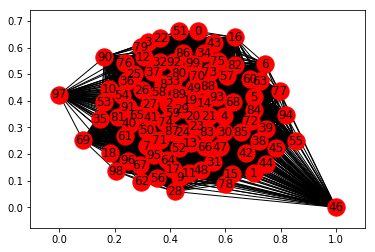

In [42]:
G = nx.from_numpy_matrix(cosine_matr)
#nx.draw(G, with_labels=True, font_weight='bold')

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'))
                       #node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
#nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos)#, edgelist=black_edges, arrows=False)

In [47]:
articles_small.text[80][:500]

'астроном установить происхождение загадочный жёлоб борозда окрестность лунный море дождь mare imbrium оказаться образоваться результат падение луна астероид вызвать возникновение море мор дождь представлять древний ударный кратер затопить поздний вулканический лава диаметр километр предполагаться возникнуть падение крупный метеорит ядро комета примерно миллиард окрестность море дождь лежать местность испещрить след осколок столкнуться луна небесный тело множество параллельный углубление известно'

In [48]:
articles_small.text[0][:500]

'статья опубликовать журнал scie ce описывать возможно предок человекообразный надсемейство homi oidea гиббон человек мнение автор небольшой обезьяна вес килограмм обитать юг европа эпоха миоцен миллион связь находка предлагать пересмотреть картина развитие дать группа животное краткий обзор статья поместить сайт каталонский палеонтологический институт имя мигель крусафон i s i u ca al de paleo ologia miquel crusafo настоящий момент учёный полагать семейство человекообразный обезьяна отделиться о'

In [43]:
i, j = np.where((cosine_matr > 0.2)&(cosine_matr < 0.21))
print(i,j)

[ 0  2  2  8 14 20 20 40 42 44 46 70 73 75 84 89 89 92 99 99] [70 14 20 99  2  2 89 89 84 46 44  0 75 73 42 20 40 99  8 92]


In [44]:
articles_small.text[0][:500]

'американский кабельный телеканал hbo издательство livi g la guage объявить скорый выход официальный учебник дотракийский язык язык специально создать сериал игра престол экранизация цикл роман джордж мартин песнь лёд огонь учебник словарь лайна курс мобильный приложение изучение дотракийский доступный октябрь книга мартин приводиться слово фраза дотракийский специально придумывать грамматик лексика язык подобно толкина создавать язык эльф мартин подготовка съёмка телесериал принять решение разра'

In [45]:
articles_small.text[70][:500]

'русский язык большинство иностранец приезжать россия большой проблема начинаться сразу алфавит похожий распространить латиница связь звучать радикальный призыв перевести русский язык латиница затея удаться прошлое вряд удаться будущее чердак писать поговорить директор институт языкознание рана андрей кибрик реалистичный способ решить проблема правило транслитерация русский имя название эпоха появление интернет мобильный телефон простор наш необъятный родина умение писать транслитой необходимый у'

In [47]:
links = cosine_df.stack().reset_index()
links.columns = ['text1', 'text2','similarity']
print(links.shape)
links.head()

(10000, 3)


,text1,text2,similarity
0,0,0,1.000000
1,0,1,0.014018
2,0,2,0.031951
3,0,3,0.105601
4,0,4,0.011686


In [48]:
links_filtered=links.loc[(links['similarity'] > 0.2) & (links['text1'] != links['text2'])]
links_filtered.shape

(118, 3)

In [49]:
#l = list(links_filtered['text1'].astype(str))
#links_filtered['text1'] = links_filtered['text1'].apply(str).values

In [50]:
G=nx.from_pandas_dataframe(links_filtered, 'text1', 'text2')

C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed

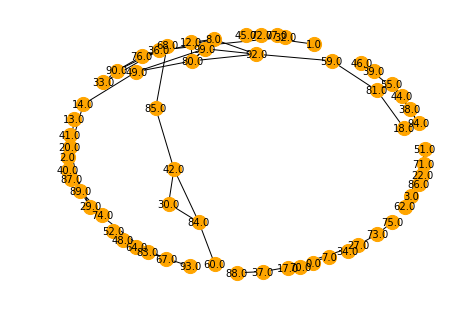

In [51]:
nx.draw(G, with_labels=True, node_color='orange', node_size=200, edge_color='black', linewidths=1, font_size=10)

In [52]:
rubric_map = dict(zip(articles_small.index, articles_small.rubrics))

In [67]:
#df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)
links_filtered = links_filtered.assign(rubric = pd.Series([rubric_map[text1_num] for text1_num in links_filtered.text1]).values)

In [71]:
links_filtered.head()

,text1,text2,similarity,rubric
37,0,37,0.344730,Культура
70,0,70,0.200704,Культура
145,1,45,0.484937,Технологии
214,2,14,0.208731,Биология
220,2,20,0.203134,Биология


### Embeddings

In [136]:
from DocSim import DocSim

In [137]:
from gensim.models.keyedvectors import KeyedVectors

C:\Program Files\Anaconda3\Lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Slow version of gensim.models.doc2vec is being used


In [139]:
model_path = 'D:/wiki.ru.vec'

In [142]:
w2v_model = KeyedVectors.load_word2vec_format(model_path, binary=True, encoding='cp1251')

UnicodeDecodeError: 'charmap' codec can't decode byte 0x98 in position 11: character maps to <undefined>

### Clustering

In [143]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import *
from sklearn.pipeline import *
from sklearn.preprocessing import Normalizer
from sklearn.metrics import *
from sklearn.cluster import *
import numpy as np

In [148]:
pipeline = Pipeline([
    ('vect', CountVectorizer(max_df = 0.9, min_df = 3, stop_words = stopwords, analyzer = 'word')),
    ('tfidf', TfidfTransformer()),
    #('svd', TruncatedSVD(n_components = 1500)),
    #('norm', Normalizer() ),
    ('clust', KMeans(n_clusters = 9, random_state = 42))
])

In [149]:
pipeline.fit(articles_small.text)

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=3,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['а', 'в', ...s=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0))])

In [147]:
clust_labels = pipeline.named_steps['clust'].labels_
labels = articles_small.rubrics

print("Homogeneity:", homogeneity_score(labels, clust_labels))
print("Completeness:", completeness_score(labels, clust_labels))
print("V-measure",  v_measure_score(labels, clust_labels))
print("Adjusted Rand-Index:",  adjusted_rand_score(labels, clust_labels))

Homogeneity: 0.476221334623
Completeness: 0.372064668475
V-measure 0.417748571449
Adjusted Rand-Index: 0.0733644941822


In [151]:
clust_labels = pipeline.named_steps['clust'].labels_
labels = articles_small.rubrics

In [152]:
labels.groupby(clust_labels).value_counts()

   rubrics            
0  Биология               4
   Космос                 2
   Культура               1
   Технологии             1
   Физиология человека    1
1  Биология               5
   История                4
   Технологии             3
   Космос                 2
   Науки о земле          2
   Физиология человека    1
2  Технологии             2
   Космос                 1
   Физика                 1
3  Культура               2
   Космос                 1
   Физиология человека    1
4  Технологии             7
   Космос                 1
5  Биология               6
   История                4
   Космос                 4
   Технологии             3
   Физика                 3
   Физиология человека    3
   Науки о земле          2
   Социология             2
   Футурология            2
   Политология            1
   Философия              1
   Химия                  1
   Экономика              1
   Язык                   1
6  Космос                 6
   История               